# 1. 훈련 세트와 테스트 세트
- 훈련 세트 : 모델을 훈련시키는 데이터
- 테스트 세트 : 모델을 평가하는 데이터m

# 2. 필요한 라이브러리 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


# 3. 데이터 세팅

## 1) 물고기 데이터

In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

## 2) 정답 데이터

In [5]:
fish_target = [1] * 35 + [0] * 14  # 도미는 1, 빙어는 0

# 4. 테스트 세트와 훈련 세트 분리
- 랜덤하게 데이터를 섞은 후, 35개는 훈련 세트로, 나머지 14개는 테스트 세트로 분리
- 섞는 방법 : 넘파이 이용
- `np.random.shuffle()` : 넘파이에서 제공하는 함수로, 배열의 인덱스를 랜덤하게 섞음

In [13]:
### kn 객체 생성
kn = KNeighborsClassifier()

In [9]:
### 데이터를 넘파이 배열로 변환
input_arr =np.array(fish_data)
target_arr = np.array(fish_target)
### (샘플 수, 특성수)
print (input_arr.shape)

(49, 2)


In [10]:
### 랜덤으로 섞기 - 인덱스를 섞음
### 인덱스 생성
index = np.arange(49)
np.random.shuffle(index)
print(index)

[41  7  3  4 22 33 42 44 47 26 28 37 19  6 25 16 20 46 18 10 34 12  8 21
 15  9 30 23 39 11 36 48 32 27 38  5 14 24 43 17 40 29 13  1  0 31 45 35
  2]


# 5. 산점도로 시각화
- 35개는 훈련 세트로, 나머지 14개는 테스트 세트로 분리

In [11]:
### 훈련 세트
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
### 테스트 세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

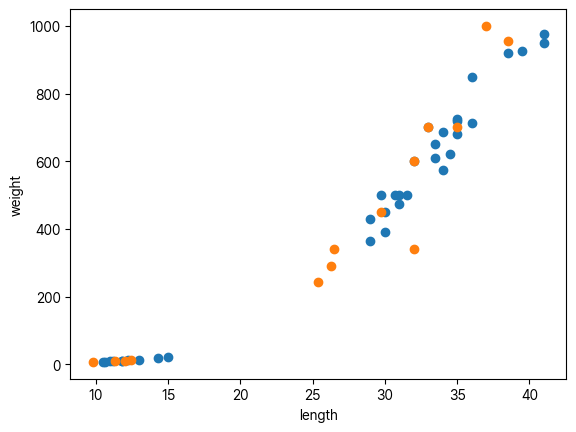

In [12]:
### 산점도로 시각화
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 6. 모델 훈련

In [16]:
### 모델 훈련 - 훈련 세트 사용
kn.fit(train_input, train_target)

### 모델 평가 - 테스트 세트 사용
print("모델 평가 : ",kn.score(test_input, test_target))

### 예측
print("예측 : ",kn.predict(test_input))

### 정답 데이터
print("정답 데이터 : ",test_target)



모델 평가 :  1.0
예측 :  [1 1 1 0 1 0 1 1 1 1 1 0 0 1]
정답 데이터 :  [1 1 1 0 1 0 1 1 1 1 1 0 0 1]
